In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import math 

Dane z https://www.kaggle.com/datasets/amirhosseinmirzaie/americancitizenincome/data

In [103]:
df = pd.read_csv("/Users/aniamarjankowska/Documents/GitHub/annual_income_analysis/income.csv")

In [104]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


In [106]:
df.shape

(25000, 15)

In [107]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,25000.00000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000
mean,38.60916,1.896611e+05,10.076320,1083.144040,87.489800,40.442800
std,13.68660,1.054713e+05,2.576967,7321.971568,402.830246,12.309706
min,17.00000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.00000,1.179830e+05,9.000000,0.000000,0.000000,40.000000
50%,37.00000,1.782110e+05,10.000000,0.000000,0.000000,40.000000
75%,48.00000,2.370682e+05,12.000000,0.000000,0.000000,45.000000
max,90.00000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- **age**: Wiek osoby.
- **workclass**: Ogólny termin wskazujący status zatrudnienia osoby.
- **fnlwgt**: Waga końcowa, reprezentująca liczbę osób, którą ta dana reprezentuje (próbka reprezentatywna).
- **education**: Najwyższy poziom wykształcenia osiągnięty przez osobę.
- **education.num**: Najwyższy poziom wykształcenia osiągnięty przez osobę w formie numerycznej.
- **marital.status**: Status cywilny osoby. Zwróć uwagę, że "Married-civ-spouse" oznacza cywilnego małżonka, a "Married-AF-spouse" odnosi się do małżonka w Siłach Zbrojnych.
- **occupation**: Ogólny typ zawodu osoby.
- **relationship**: Relacja tej osoby z innymi, na przykład małżonek (mąż). Każdy punkt danych ma tylko jedną relację.
- **race**: Rasa.
- **sex**: Płeć biologiczna osoby.
- **capital.gain**: Zyski kapitałowe osoby.
- **capital.loss**: Straty kapitałowe osoby.
- **hours.per.week**: Liczba godzin, które osoba zadeklarowała jako przepracowane w tygodniu.
- **native.country**: Kraj pochodzenia.
- **income**: Dochód, mniejszy lub równy $50,000 (`<=50K`) lub większy (`>50K`).


In [108]:
def categorical_value_counts(data):
    categorical_cols = data.select_dtypes(include=['object']).columns 
    value_counts = {col: data[col].value_counts() for col in categorical_cols}
    return value_counts 

In [109]:
# Załóżmy, że masz DataFrame o nazwie data
value_counts = categorical_value_counts(df)

# Wyświetlenie wyników
for col, counts in value_counts.items():
    print(f"\nColumn: {col}")
    print(counts)



Column: workclass
workclass
Private             17471
Self-emp-not-inc     1935
Local-gov            1553
?                    1429
State-gov            1004
Self-emp-inc          851
Federal-gov           740
Without-pay            12
Never-worked            5
Name: count, dtype: int64

Column: education
education
HS-grad         8025
Some-college    5621
Bachelors       4104
Masters         1301
Assoc-voc       1063
11th             905
Assoc-acdm       809
10th             736
7th-8th          476
Prof-school      449
9th              403
12th             344
Doctorate        328
5th-6th          265
1st-4th          135
Preschool         36
Name: count, dtype: int64

Column: marital.status
marital.status
Married-civ-spouse       11518
Never-married             8204
Divorced                  3390
Separated                  792
Widowed                    766
Married-spouse-absent      312
Married-AF-spouse           18
Name: count, dtype: int64

Column: occupation
occupation
Prof-sp

In [110]:
# Funkcja do obliczania V-Cramera
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

def cramers_v_output(v_cramer, variable1, variable2):
    print(f"V-Cramer dla zmiennych {variable1} & {variable2}: {v_cramer}")

    # Interpretacja wyniku
    if v_cramer < 0.1:
        print("Bardzo słaba zależność")
    elif v_cramer < 0.3:
        print("Słaba zależność")
    elif v_cramer < 0.5:
        print("Umiarkowana zależność")
    else:
        print("Silna zależność")

In [111]:
# Utworzenie macierzy contingency
contingency_table = pd.crosstab(df['relationship'], df['marital.status'])
# Obliczenie V-Cramera
v_cramer = cramers_v(contingency_table)
cramers_v_output(v_cramer, 'relationship', 'marital.status')

V-Cramer dla zmiennych relationship & marital.status: 0.4890628765894769
Umiarkowana zależność


In [112]:
contingency_table = pd.crosstab(df['workclass'], df['occupation'])
# Obliczenie V-Cramera
v_cramer = cramers_v(contingency_table)
cramers_v_output(v_cramer, 'workclass', 'occupation')


V-Cramer dla zmiennych workclass & occupation: 0.39858811874024
Umiarkowana zależność


In [113]:
# Utworzenie macierzy contingency
contingency_table = pd.crosstab(df['race'], df['native.country'])

# Obliczenie V-Cramera
v_cramer = cramers_v(contingency_table)
cramers_v_output(v_cramer, 'race', 'native.country')


V-Cramer dla zmiennych race & native.country: 0.41116173339470086
Umiarkowana zależność


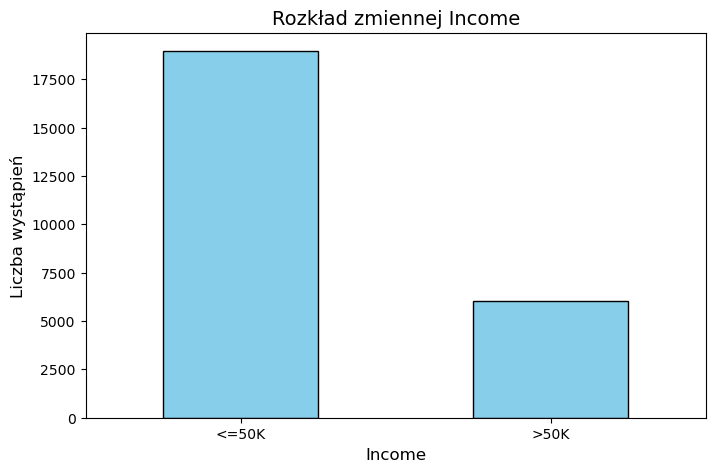

In [114]:
plt.figure(figsize=(8, 5))
df['income'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Rozkład zmiennej Income', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Liczba wystąpień', fontsize=12)
plt.xticks(rotation=0)  # Ustawienie etykiet osi X poziomo

# Wyświetlenie wykresu
plt.show()


In [115]:
print(f"Klasa pozytywna to: {df['income'].value_counts()[1] / (df['income'].value_counts()[0] + df['income'].value_counts()[1]) * 100}% zbioru danych.")

Klasa pozytywna to: 24.18% zbioru danych.


In [116]:
# Utworzenie nowej zmiennej jako różnicy między capital.gain i capital.loss
df['net.capital'] = df['capital.gain'] - df['capital.loss']

# Sprawdzenie statystyk nowej zmiennej
print(df['net.capital'].describe())

# Podgląd wartości
print(df[['capital.gain', 'capital.loss', 'net.capital']].head())

count    25000.000000
mean       995.654240
std       7345.956408
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: net.capital, dtype: float64
   capital.gain  capital.loss  net.capital
0         99999             0        99999
1             0             0            0
2             0             0            0
3             0             0            0
4             0             0            0


In [117]:
print((df['net.capital'] == 0).sum())

21719


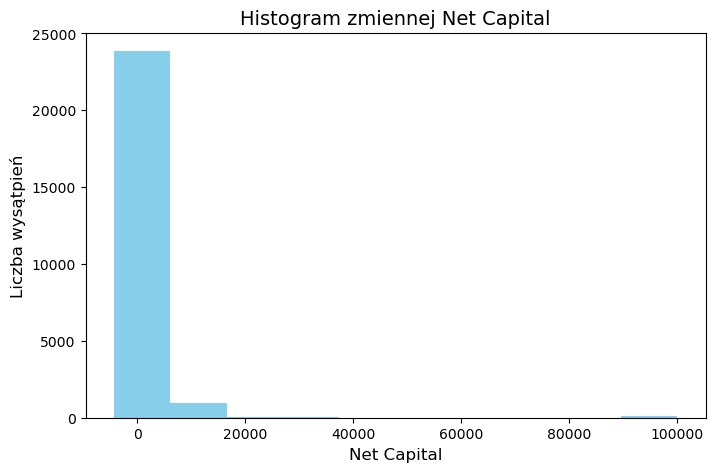

In [118]:
plt.figure(figsize=(8, 5))
plt.hist(df['net.capital'], color='skyblue')

plt.title("Histogram zmiennej Net Capital", fontsize=14)
plt.xlabel("Net Capital", fontsize=12)
plt.ylabel("Liczba wysątpień", fontsize=12)

plt.show()

In [119]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Funkcja do obliczania współczynnika Craméra V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)  # Tabela kontyngencji
    chi2, _, _, _ = chi2_contingency(contingency_table)  # Oblicz statystykę chi-kwadrat
    n = contingency_table.sum().sum()  # Liczba obserwacji
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Tworzenie macierzy korelacji dla zmiennych kategorycznych
categorical_cols = df.select_dtypes(include=['object']).columns  # Wybieramy zmienne kategoryczne
correlation_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0  # Korelacja ze sobą = 1
        else:
            correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Konwersja do typu float i wyświetlenie
correlation_matrix = correlation_matrix.astype(float)
print(correlation_matrix)


                workclass  education  marital.status  occupation  \
workclass        1.000000   0.100657        0.084840    0.398588   
education        0.100657   1.000000        0.090707    0.188135   
marital.status   0.084840   0.090707        1.000000    0.133396   
occupation       0.398588   0.188135        0.133396    1.000000   
relationship     0.098284   0.122701        0.489063    0.179059   
race             0.058059   0.075826        0.083431    0.085035   
sex              0.154415   0.096024        0.463503    0.421915   
native.country   0.048455   0.136863        0.075921    0.076881   
income           0.178589   0.371728        0.445960    0.354144   

                relationship      race       sex  native.country    income  
workclass           0.098284  0.058059  0.154415        0.048455  0.178589  
education           0.122701  0.075826  0.096024        0.136863  0.371728  
marital.status      0.489063  0.083431  0.463503        0.075921  0.445960  
occupation 

In [120]:
def calculate_woe_iv(data, feature, target):
    df = pd.DataFrame()
    df['count'] = data.groupby(feature)[target].count()
    df['good'] = data[data[target] == '>50K'].groupby(feature)[target].count()
    df['bad'] = df['count'] - df['good']
    df['good_dist'] = df['good'] / df['good'].sum()
    df['bad_dist'] = df['bad'] / df['bad'].sum()
    df['woe'] = np.log((df['good_dist'] + 1e-6) / (df['bad_dist'] + 1e-6))
    df['iv'] = (df['good_dist'] - df['bad_dist']) * df['woe']
    return df['iv'].sum()

iv_var1 = calculate_woe_iv(df, 'workclass', 'income')
iv_var2 = calculate_woe_iv(df, 'occupation', 'income')
print(f"IV for var1: {iv_var1}, IV for var2: {iv_var2}")


IV for var1: 0.1601385533935683, IV for var2: 0.7627724797618373


In [121]:
iv_var1 = calculate_woe_iv(df, 'relationship', 'income')
iv_var2 = calculate_woe_iv(df, 'marital.status', 'income')
print(f"IV for var1: {iv_var1}, IV for var2: {iv_var2}")

IV for var1: 1.5333397043641683, IV for var2: 1.329846662021718


In [122]:
iv_var1 = calculate_woe_iv(df, 'race', 'income')
iv_var2 = calculate_woe_iv(df, 'native.country', 'income')
print(f"IV for var1: {iv_var1}, IV for var2: {iv_var2}")

IV for var1: 0.06348640955304106, IV for var2: 0.07871601974692946
